In [21]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math
import sys
import numpy as np
import random
import tensorly as tl
from tensorly.decomposition import parafac
from img_utils import normalize, rgb_to_gray, dataloader, full_trace

import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torchvision.utils import save_image
import matplotlib.pyplot as plt

import sys

def normalize(img, min_val = 0, max_val = 1):
    return (img - np.min(img)) / (np.max(img) - np.min(img)) * (max_val - min_val) + min_val

def calculate_loss(target_image):
#     print(target_image.shape)
    xlen, ylen = selected_patch.shape
    total_loss = _lambda * torch.sum((target_image - y_img)**2) + alpha * torch.sum((target_image - y_cp_img)**2) + beta * torch.sqrt(torch.sum((target_image[:,1:,:] - target_image[:,:xlen-1,:])**2) + torch.sum((target_image[:,:,1:] - target_image[:,:,:ylen-1])**2))
    return total_loss

device=torch.device( "cuda" if (torch.cuda.is_available()) else 'cpu')


random.seed(1)
# random.seed(666)

# for ite, n_st in zip(range(2,6), [70,90,110,130]):

#     for _ in range(1):
for ite in range(0,4,2):

    idx = random.randint(0, 1000)
    
#     selected_patch = np.load('/home/haiwen/noise_reduction/data_final/noise_data/synthetic_multi_{}/s{}.npy'.format(n_st, 30 + ite + 100 * (ite % 2))) #test_for_show_noise
    selected_patch = normalize(np.load('./parameter_test/beatrice_content_256/{}.npy'.format(idx)), 0, 255)
    y_cp_img = torch.from_numpy(normalize(np.load('tdtv_patch_{}.npy'.format(idx)), 0, 255)).float().unsqueeze(0).to(device,torch.float)
    y_img = torch.from_numpy(selected_patch).float().unsqueeze(0).to(device,torch.float)
    x_img = torch.rand(256,256).float().unsqueeze(0).to(device,torch.float)

    #initialize the paramerters required for fitting the model
    epoch=8000
    lr=0.04
    alpha=0.05
    _lambda = 0.02
    beta=10

    #using adam optimizer and it will update the generated image not the model parameter 
    optimizer=optim.Adam([x_img],lr=lr)

    #iterating for 1000 times
    for e in range(epoch):
        #extracting the features of generated, content and the original required for calculating the loss

        #iterating over the activation of each layer and calculate the loss and add it to the content and the style loss
        x_img.requires_grad_(True)
        total_loss=calculate_loss(x_img)
        total_loss.requires_grad_(True)
        #optimize the pixel values of the generated image and backpropagate the loss
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        #print the image and save it after each 100 epoch
        if(not (e%100)):
            print(total_loss)
        #     np.save('tdtv_patch_{}_{}.npy'.format(ite, n_st), matrix_x / matrix_w)
            np.save('tdtv_patch_{}_f.npy'.format(idx), x_img[0].detach().cpu().numpy(), 0, 255)
#             print(normalize(x_img[0].detach().cpu().numpy(), 0, 1))

tensor(84314624., device='cuda:0', grad_fn=<AddBackward0>)
tensor(79798024., device='cuda:0', grad_fn=<AddBackward0>)
tensor(75492112., device='cuda:0', grad_fn=<AddBackward0>)
tensor(71390776., device='cuda:0', grad_fn=<AddBackward0>)
tensor(67486120., device='cuda:0', grad_fn=<AddBackward0>)
tensor(63770572., device='cuda:0', grad_fn=<AddBackward0>)
tensor(60236880., device='cuda:0', grad_fn=<AddBackward0>)
tensor(56878064., device='cuda:0', grad_fn=<AddBackward0>)
tensor(53687400., device='cuda:0', grad_fn=<AddBackward0>)
tensor(50658448., device='cuda:0', grad_fn=<AddBackward0>)
tensor(47784968., device='cuda:0', grad_fn=<AddBackward0>)
tensor(45060960., device='cuda:0', grad_fn=<AddBackward0>)
tensor(42480608., device='cuda:0', grad_fn=<AddBackward0>)
tensor(40038300., device='cuda:0', grad_fn=<AddBackward0>)
tensor(37728600., device='cuda:0', grad_fn=<AddBackward0>)
tensor(35546244., device='cuda:0', grad_fn=<AddBackward0>)
tensor(33486110., device='cuda:0', grad_fn=<AddBackward0

[[174.47198  171.76427  168.8751   ... 119.78159  113.96812  106.865875]
 [181.27293  181.73605  181.92807  ... 116.408875 110.00906  102.53253 ]
 [186.35832  188.11414  189.59953  ... 111.54431  105.17692   98.25822 ]
 ...
 [185.63284  192.65903  198.81458  ... 137.38536  142.94702  147.81898 ]
 [184.61482  190.56836  195.67047  ... 136.63104  141.84267  144.92798 ]
 [181.46095  185.86931  189.25801  ... 136.14539  139.57216  140.61179 ]]


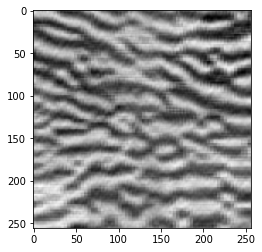

In [27]:
plt.imshow(np.load('tdtv_patch_582_f.npy'), cmap='gray')
print(np.load('tdtv_patch_582_f.npy'))

[[100.3743    85.980095  71.8706   ... 152.41231  137.19955  113.22226 ]
 [ 85.46831   75.9699    67.27634  ... 166.92308  151.10072  127.28588 ]
 [ 80.25624   70.747765  62.999897 ... 173.24226  157.99254  136.91681 ]
 ...
 [ 98.940674 109.347534 118.69602  ... 159.76616  165.74585  170.45062 ]
 [ 93.853035 100.02174  105.36266  ... 185.52203  189.63333  186.42213 ]
 [ 90.38834   91.795395  91.36733  ... 202.59883  201.10504  190.86127 ]]


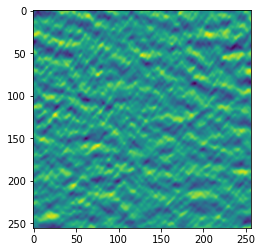

In [26]:

plt.imshow(selected_patch)
print(selected_patch)

[[ 33498.6953125   34332.6796875   35052.625      ... -14279.01757812
  -15255.66699219 -15562.52539062]
 [ 41331.69921875  43546.00390625  45474.8515625  ... -19450.97460938
  -20755.83398438 -21375.97460938]
 [ 46028.03125     49202.0234375   51882.9921875  ... -24023.09570312
  -25447.34960938 -26207.70703125]
 ...
 [ 41727.91796875  44988.66796875  47867.9765625  ...  -3719.13842773
   -1027.84765625   1487.79516602]
 [ 41980.3515625   45205.23828125  48036.65625    ...  -9261.65527344
   -6434.33935547  -3664.64208984]
 [ 40355.62109375  43298.6953125   45809.0078125  ... -12932.93554688
  -10297.36425781  -7630.63330078]]


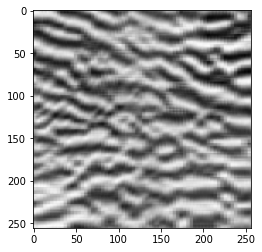

In [20]:
plt.imshow(np.load('tdtv_patch_582.npy'), cmap='gray')
print(np.load('tdtv_patch_582.npy'))

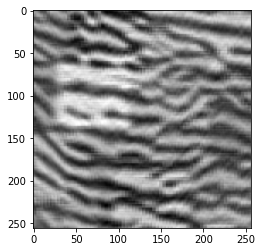

In [23]:
plt.imshow(np.load('tdtv_patch_137_f.npy'), cmap='gray')

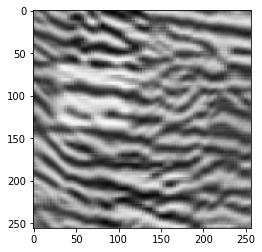

In [10]:
plt.imshow(np.load('tdtv_patch_137.npy'), cmap='gray')